[TODO] Make some actual plots!!!

- PCA
- PCoA?
- Others?

In [1]:
from headers import *

In [41]:
from helpers import color_palette

In [126]:
import phate

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import count

In [46]:
_args = dict(sep='\t', index_col=0)
geo_counts = pd.read_csv(GEO_COUNTS, **_args)
geo_tpm = pd.read_csv(GEO_TPM, **_args)
print(geo_tpm.shape)
geo_attrs = pd.read_csv(GEO_ATTRS, **_args)

(45057, 78)


In [57]:
# Filter the attrs/sample metadata.
m = geo_attrs['Sample_characteristics_ch1_molecule_subtype'] == 'polyA RNA extracted from whole cells'
attrs = geo_attrs.loc[m].copy()
print(attrs.shape)

set(geo_tpm.columns) - set(attrs.index)

(78, 24)


set()

# Shape

From the docs, it looks like PHATE wants samples in rows and attributes (genes) in columns.

```
fit(X)[source]
Computes the diffusion operator

Parameters:	X (array, shape=[n_samples, n_features]) ...
```

In [13]:
tpm = geo_tpm.T
tpm.head(2)

gene_id,ENSG00000000003.14,ENSG00000000419.12,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.12,ENSG00000001167.14,ENSG00000001460.18,...,ENSG00000286261.1,ENSG00000286262.1,ENSG00000286263.1,ENSG00000286264.1,ENSG00000286266.1,ENSG00000286268.1,ENSG00000286269.1,ENSG00000286270.1,ENSG00000286271.1,ENSG00000286272.1
Calu3_polyA_series1-S1-4h-A,92.132940,328.754469,11.777226,19.277879,0.0,4.177568,85.816407,28.242968,67.882424,3.821541,...,1.256622,1.391896,0.0,100.046219,0.0,44.564593,0.0,0.0,0.0,0.0
Calu3_polyA_series1-S1-4h-B,97.628364,329.263098,11.575614,20.058789,0.0,3.748817,83.017693,28.501021,66.475391,3.699718,...,0.718878,0.000000,0.0,93.905926,0.0,44.330403,0.0,0.0,0.0,0.0


> ### Transformation

> In scRNA-seq analysis, the data is often $\log$-transformed. This typically requires the addition of some small value to avoid taking $\log(0)$. We avoid this issue entirely by instead taking the square root transform. The square root function has a similar form as the $\log$ function with the added benefit of being stable at 0.

In [15]:
sqrt_tpm = tpm.transform(np.sqrt)
sqrt_tpm.head(2)

gene_id,ENSG00000000003.14,ENSG00000000419.12,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.12,ENSG00000001167.14,ENSG00000001460.18,...,ENSG00000286261.1,ENSG00000286262.1,ENSG00000286263.1,ENSG00000286264.1,ENSG00000286266.1,ENSG00000286268.1,ENSG00000286269.1,ENSG00000286270.1,ENSG00000286271.1,ENSG00000286272.1
Calu3_polyA_series1-S1-4h-A,9.598591,18.131588,3.431796,4.390658,0.0,2.043910,9.263715,5.314411,8.239079,1.954876,...,1.120991,1.179787,0.0,10.002311,0.0,6.675672,0.0,0.0,0.0,0.0
Calu3_polyA_series1-S1-4h-B,9.880707,18.145608,3.402295,4.478704,0.0,1.936186,9.111405,5.338635,8.153244,1.923465,...,0.847867,0.000000,0.0,9.690507,0.0,6.658108,0.0,0.0,0.0,0.0


<a id='embedding'></a>
## 3. Embedding Data Using PHATE

### 3.1 Instantiating the PHATE estimator

The API of PHATE models that of Scikit Learn. First, you instantiate a PHATE estimator object with the parameters for fitting the PHATE embedding to a given dataset. Next, you use the `fit` and `fit_transform` functions to generate an embedding. For more information, check out [**the PHATE readthedocs page**](http://phate.readthedocs.io/).

We'll just use the default parameters for now, but the following parameters can be tuned (read our documentation at [phate.readthedocs.io](https://phate.readthedocs.io/) to learn more):

* `knn` : Number of nearest neighbors (default: 5). Increase this (e.g. to 20) if your PHATE embedding appears very disconnected. You should also consider increasing `knn` if your dataset is extremely large (e.g. >100k cells)
* `decay` : Alpha decay (default: 15). Decreasing `decay` increases connectivity on the graph, increasing `decay` decreases connectivity. This rarely needs to be tuned. Set it to `None` for a k-nearest neighbors kernel.
* `t` : Number of times to power the operator (default: 'auto'). This is equivalent to the amount of smoothing done to the data. It is chosen automatically by default, but you can increase it if your embedding lacks structure, or decrease it if the structure looks too compact.
* `gamma` : Informational distance constant (default: 1). `gamma=1` gives the PHATE log potential, but other informational distances can be interesting. If most of the points seem concentrated in one section of the plot, you can try `gamma=0`.

Here's the simplest way to apply PHATE:

## Using tpm

In [17]:
phate_operator = phate.PHATE(n_jobs=-2)

# Y_phate = phate_operator.fit_transform(EBT_counts)

Y_phate = phate_operator.fit_transform(tpm)

Calculating PHATE...
  Running PHATE on 78 observations and 45057 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...


/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (78, 45057) is expensive. Consider setting n_pca.
  warnings.warn(


    Calculated KNN search in 0.40 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 0.51 seconds.
  Calculating optimal t...


/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=78 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


    Automatically selected t = 10
  Calculated optimal t in 2.93 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.13 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.23 seconds.
Calculated PHATE in 3.86 seconds.


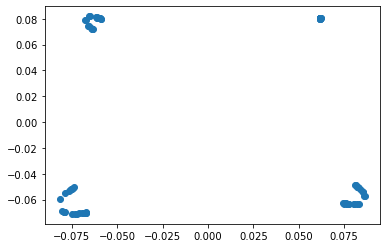

In [25]:
plt.scatter(x=Y_phate[:, 0], y=Y_phate[:, 1])

## Using sqrt(tpm)

In [26]:
phate_operator = phate.PHATE(n_jobs=-2)

# Y_phate = phate_operator.fit_transform(EBT_counts)

Y_phate = phate_operator.fit_transform(sqrt_tpm)

Calculating PHATE...
  Running PHATE on 78 observations and 45057 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.12 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.14 seconds.
  Calculating optimal t...
    Automatically selected t = 7
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.01 seconds.
Calculated PHATE in 0.19 seconds.


/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (78, 45057) is expensive. Consider setting n_pca.
  warnings.warn(
/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=78 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


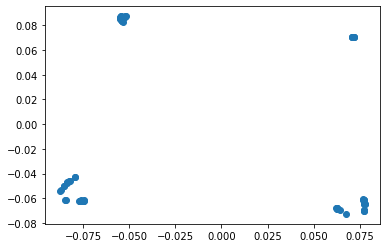

In [27]:
plt.scatter(x=Y_phate[:, 0], y=Y_phate[:, 1])

Since we are looking for subtle structure and we expect some of the trajectories to be sparse, we might want to decrease `knn` from the default of 5, and reduce `t` from the automatic value of 21 (printed in the output above). For single-cell RNA-seq you can try `knn` as low as 3 or 4 if you're looking for subtle structure, or as high as 30 or 40 if you have hundreds of thousands of cells. We'll also reduce `alpha` here to 15 to partially offset the decreased connectivity as a result of decreasing `knn`.

In [28]:
phate_operator.set_params(knn=4, decay=15, t=12)
# We could also create a new operator:
# phate_operator = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)

Y_phate = phate_operator.fit_transform(tpm)

Calculating PHATE...
  Running PHATE on 78 observations and 45057 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...


/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (78, 45057) is expensive. Consider setting n_pca.
  warnings.warn(


    Calculated KNN search in 0.31 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.34 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.01 seconds.
Calculated PHATE in 0.36 seconds.


/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=78 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


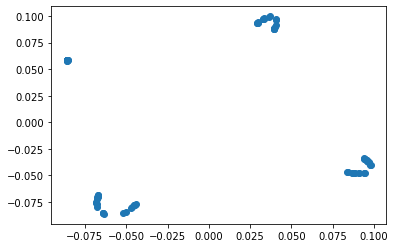

In [29]:
plt.scatter(x=Y_phate[:, 0], y=Y_phate[:, 1])

In [30]:
phate_operator.set_params(knn=4, decay=15, t=12)
# We could also create a new operator:
# phate_operator = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)

Y_phate = phate_operator.fit_transform(sqrt_tpm)

Calculating PHATE...
  Running PHATE on 78 observations and 45057 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.13 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.01 seconds.
Calculated PHATE in 16.09 seconds.


/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (78, 45057) is expensive. Consider setting n_pca.
  warnings.warn(
/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=78 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


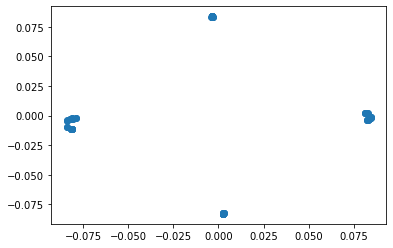

In [31]:
plt.scatter(x=Y_phate[:, 0], y=Y_phate[:, 1])

## Comparison with other visualization tools

In this section we will compare PHATE to other common visualization tools on this dataset.

* PCA
* t-SNE

Neither of these methods accept sparse input, so this will only work if you have a lot of memory available. Also, we apply PCA before t-SNE, as is common practice.

In [69]:
pca_operator = sklearn.decomposition.PCA(n_components=2)
Y_pca = pca_operator.fit_transform(np.array(DATA))
df_pca = pd.DataFrame(Y_pca, index=DATA.index)
df_pca

,0,1
Calu3_polyA_series1-S1-4h-A,-198.660114,-27.117832
Calu3_polyA_series1-S1-4h-B,-199.277133,-26.891414
Calu3_polyA_series1-S1-12h-A,-206.692899,-39.937104
Calu3_polyA_series1-S1-12h-B,-208.177309,-40.364132
Calu3_polyA_series1-S1-24h-A,-224.929161,-63.202513
...,...,...
H1299_polyA_mock-4h-B,270.821530,-137.408159
H1299_polyA_mock-36h-A,269.906996,-138.371890
H1299_polyA_mock-36h-B,270.815005,-139.582088
H1299_polyA_untr-4h-A,269.905009,-136.511277


In [151]:
import sklearn.decomposition # PCA
import sklearn.manifold # t-SNE
import time

# DATA = tpm
DATA = sqrt_tpm


# PCA
start = time.time()

pca_operator = sklearn.decomposition.PCA(n_components=2)
Y_pca = pca_operator.fit_transform(np.array(DATA))
df_pca = pd.DataFrame(Y_pca, index=DATA.index)
df_pca = df_pca.merge(attrs, left_index=True, right_index=True)

end = time.time()
print("Embedded PCA in {:.2f} seconds.".format(end-start))

# tSNE
start = time.time()

pca_operator = sklearn.decomposition.PCA(n_components=10)
tsne_operator = sklearn.manifold.TSNE(n_components=2)
Y_tsne = tsne_operator.fit_transform(pca_operator.fit_transform(np.array(DATA)))
df_tsne = pd.DataFrame(Y_tsne, index=DATA.index)
df_tsne = df_tsne.merge(attrs, left_index=True, right_index=True)

end = time.time()
print("Embedded t-SNE in {:.2f} seconds.".format(end-start))

# PHATE
start = time.time()

phate_operator.set_params(n_jobs=-2)
Y_phate = phate_operator.fit_transform(DATA)
df_phate = pd.DataFrame(Y_phate, index=DATA.index)
df_phate = df_phate.merge(attrs, left_index=True, right_index=True)

end = time.time()
print("Embedded PHATE in {:.2f} seconds.".format(end-start))

Embedded PCA in 0.20 seconds.
Embedded t-SNE in 1.15 seconds.
Embedded PHATE in 0.01 seconds.


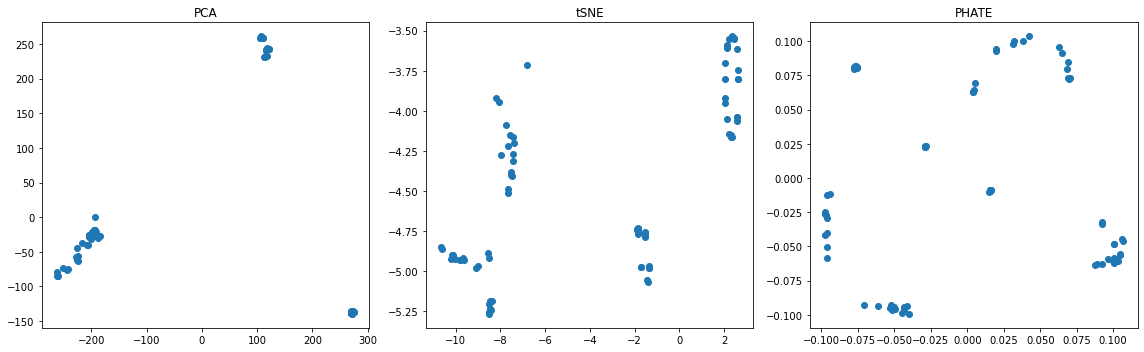

In [152]:
# plot everything
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16, 5))

#plotting PCA
# scprep.plot.scatter2d(Y_pca, label_prefix="PC", title="PCA",
#                       c=sample_labels, ticks=False, cmap='Spectral', ax=ax1)
plt.subplot(1,3,1)
plt.scatter(x=Y_pca[:, 0], y=Y_pca[:, 1])
plt.title('PCA')

#plotting tSNE
# scprep.plot.scatter2d(Y_tsne, label_prefix="t-SNE", title="t-SNE", legend=False,
#                       c=sample_labels, ticks=False, cmap='Spectral', ax=ax2)
plt.subplot(1,3,2)
plt.scatter(x=Y_tsne[:, 0], y=Y_tsne[:, 1])
plt.title('tSNE')

#plotting PHATE
# scprep.plot.scatter2d(Y_phate, label_prefix="PHATE", title="PHATE", legend=False,
#                       c=sample_labels, ticks=False, cmap='Spectral', ax=ax3)
plt.subplot(1,3,3)
plt.scatter(x=Y_phate[:, 0], y=Y_phate[:, 1])
plt.title('PHATE')

plt.tight_layout()
plt.show()

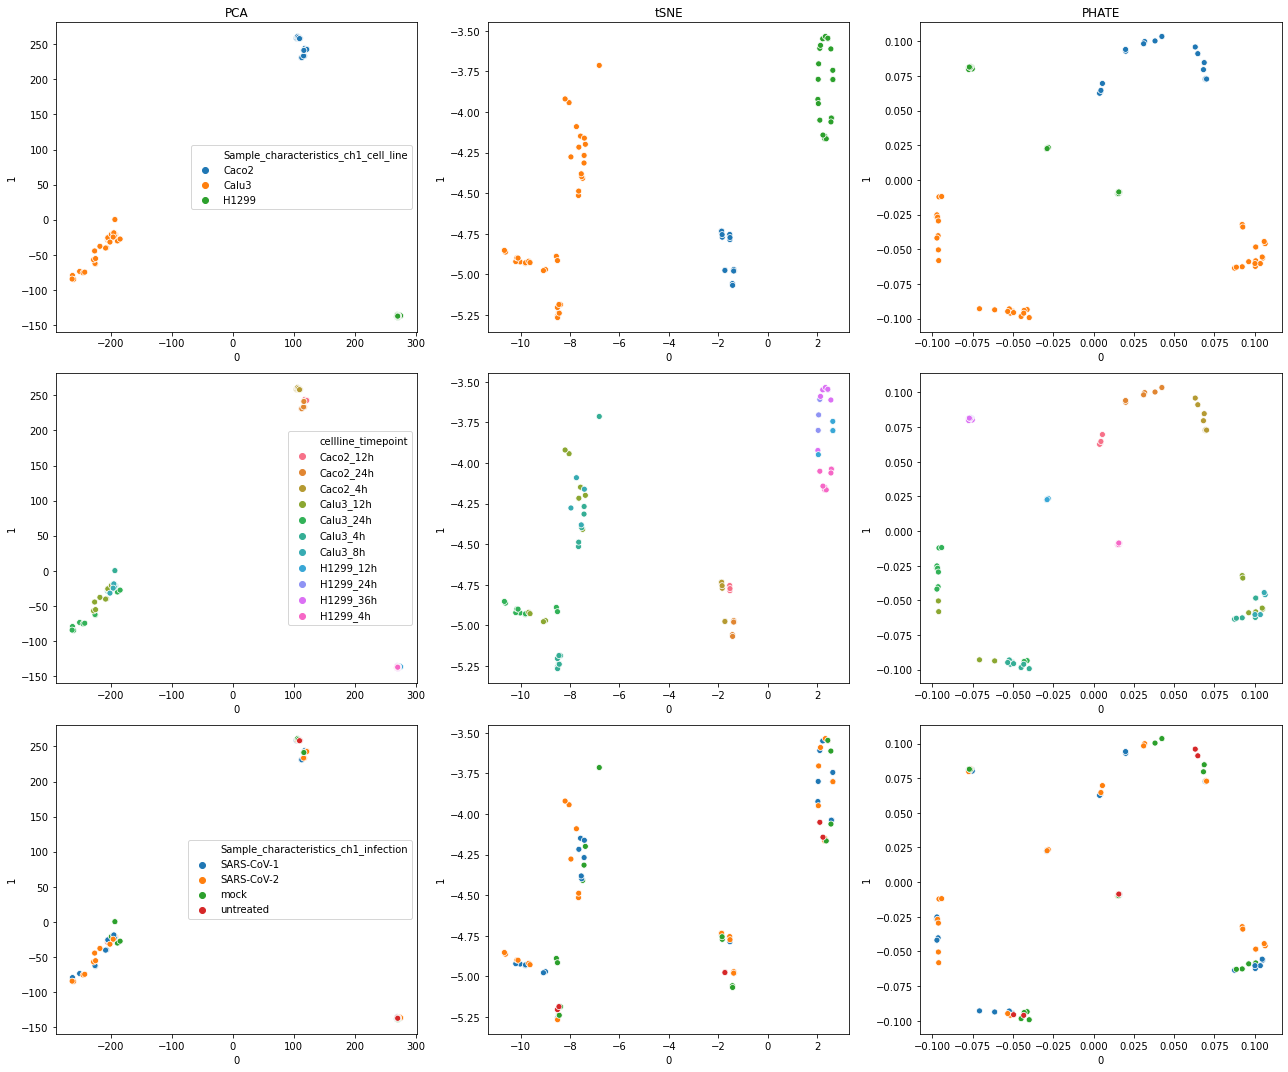

In [168]:
attrs['cellline_timepoint'] = attrs['Sample_characteristics_ch1_cell_line'] + '_' + attrs['Sample_characteristics_ch1_time_point']

# plot everything
n_rows = 3
n_cols = 3
width = n_cols*6
height=n_rows*5
plt.subplots(n_rows,n_cols, figsize=(width, height))
subplot = count(start=1)

# Row 1
attribute = 'Sample_characteristics_ch1_cell_line'
for name, df in dict(PCA=df_pca, tSNE=df_tsne, PHATE=df_phate).items():
    plt.subplot(n_rows,n_cols,next(subplot))
    sns.scatterplot(data=df, x=0, y=1, hue=attrs[attribute])
    if name == 'PCA':
        plt.gca().legend(loc='center right')
    else:
        plt.gca().get_legend().remove()
    plt.title(name)

# Row 2
# attribute = 'Sample_characteristics_ch1_time_point'
attribute = 'cellline_timepoint'
for name, df in dict(PCA=df_pca, tSNE=df_tsne, PHATE=df_phate).items():
    plt.subplot(n_rows,n_cols,next(subplot))
    sns.scatterplot(data=df, x=0, y=1, hue=attrs[attribute])
    if name == 'PCA':
        plt.gca().legend(loc='center right')
    else:
        plt.gca().get_legend().remove()


# Row 3
attribute = 'Sample_characteristics_ch1_infection'
for name, df in dict(PCA=df_pca, tSNE=df_tsne, PHATE=df_phate).items():
    plt.subplot(n_rows,n_cols,next(subplot))
    sns.scatterplot(data=df, x=0, y=1, hue=attrs[attribute])
    if name == 'PCA':
        plt.gca().legend(loc='center right')
    else:
        plt.gca().get_legend().remove()

plt.tight_layout()
plt.show()

In [136]:
?phate_operator

/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


Type:        PHATE
String form: PHATE(decay=15, knn=8, n_jobs=-2, t=12)
File:        ~/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/phate/phate.py
Docstring:  
PHATE operator which performs dimensionality reduction.

Potential of Heat-diffusion for Affinity-based Trajectory Embedding
(PHATE) embeds high dimensional single-cell data into two or three
dimensions for visualization of biological progressions as described
in Moon et al, 2017 [1]_.

Parameters
----------

n_components : int, optional, default: 2
    number of dimensions in which the data will be embedded

knn : int, optional, default: 5
    number of nearest neighbors on which to build kernel

decay : int, optional, default: 40
    sets decay rate of kernel tails.
    If None, alpha decaying kernel is not used

n_landmark : int, optional, default: 2000
    number of landmarks to use in fast PHATE

t : int, optional, default: 'auto'
    power to which the diffusion operator is powered.
    This sets the level o

/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (78, 45057) is expensive. Consider setting n_pca.
  warnings.warn(
/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=78 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (78, 45057) is expensive. Consider setting n_pca.
  warnings.warn(
/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=78 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnin

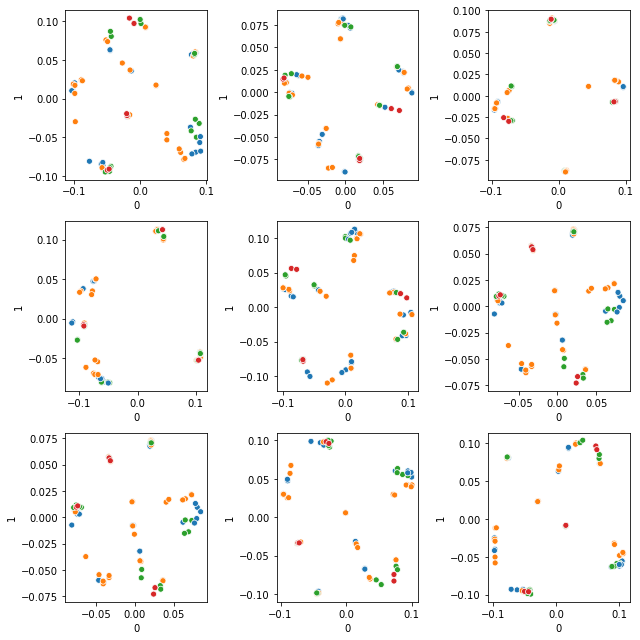

In [144]:
n_rows = 3
n_cols = 3
subplot = count(start=1)
height=n_rows*3
width=n_cols*3
plt.subplots(n_rows, n_cols, figsize=(width, height))

for knn in [2,4,8]:
    phate_operator.set_params(knn=knn, n_jobs=-2, verbose=False)
    Y_phate = phate_operator.fit_transform(DATA)
    df_phate = pd.DataFrame(Y_phate, index=DATA.index)
    df_phate = df_phate.merge(attrs, left_index=True, right_index=True)
    
    plt.subplot(n_rows, n_cols, next(subplot))
    sns.scatterplot(data=df_phate, x=0, y=1, hue=attrs[attribute], legend=False)

for decay in [5,15,40]:
    phate_operator.set_params(knn=2, decay=decay, n_jobs=-2, verbose=False)
    Y_phate = phate_operator.fit_transform(DATA)
    df_phate = pd.DataFrame(Y_phate, index=DATA.index)
    df_phate = df_phate.merge(attrs, left_index=True, right_index=True)
    
    plt.subplot(n_rows, n_cols, next(subplot))
    sns.scatterplot(data=df_phate, x=0, y=1, hue=attrs[attribute], legend=False)
    
for t in [2,3,4]:
    phate_operator.set_params(knn=2, decay=40, t=t, n_jobs=-2, verbose=False)
    Y_phate = phate_operator.fit_transform(DATA)
    df_phate = pd.DataFrame(Y_phate, index=DATA.index)
    df_phate = df_phate.merge(attrs, left_index=True, right_index=True)
    
    plt.subplot(n_rows, n_cols, next(subplot))
    sns.scatterplot(data=df_phate, x=0, y=1, hue=attrs[attribute], legend=False)

plt.tight_layout()